<a href="https://colab.research.google.com/github/uurtsaikh201/chat/blob/master/Foodhub_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 16.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data
import pandas as pd

# Assuming your data is in a CSV file named 'foodhub_order.csv' within the mounted Google Drive folder
file_path = '/content/drive/MyDrive/foodhub_order.csv'

# Read the CSV file into a pandas DataFrame called 'foodhub_df'
foodhub_df = pd.read_csv(file_path)

In [ ]:
# Write your code here to view the first 5 rows
print(foodhub_df.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
num_rows, num_columns = foodhub_df.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1898
Number of columns: 9


#### Observations:
There are 1898 rows and 9 columns in the dataset.



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# get food hub dataset info
dfInfo = foodhub_df.info()
print(dfInfo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:
There is no null values in the dataset.

4 integer columns including ids.

1 float column.

4 object columns for the categorical values.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# detect missing data
missing_data = foodhub_df.isnull().sum()
if missing_data.any():
  print("There are missing values in the data.")
  # Handle missing values based on the data type of each column
  # For numerical columns: fill with median
  numeric_columns = foodhub_df.select_dtypes(include=['int64', 'float64']).columns
  foodhub_df[numeric_columns] = foodhub_df[numeric_columns].fillna(foodhub_df[numeric_columns].median())
  # For categorical columns: fill with mode (most frequent value)
  categorical_columns = foodhub_df.select_dtypes(include=['object']).columns
  foodhub_df[categorical_columns] = foodhub_df[categorical_columns].fillna(foodhub_df[categorical_columns].mode().iloc[0])
else:
  print("There are no missing values in the data. Therefore, no need to treat the missing values")

There are no missing values in the data. Therefore, no need to treat the missing values


#### Observations:
There is no missing valeus, so we don't need to treat them.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
!pip install matplotlib -q --user

Statistical Summary of Food Preparation Time:
count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

Specific Metrics for Food Preparation Time (in minutes):
Minimum time: 20 minutes
Average time: 27.37 minutes
Maximum time: 35 minutes

Frequency Distribution:
food_preparation_time
20    119
21    135
22    123
23    123
24    121
25    113
26    115
27    123
28    121
29    109
30    119
31    116
32    113
33    118
34    113
35    117
Name: count, dtype: int64


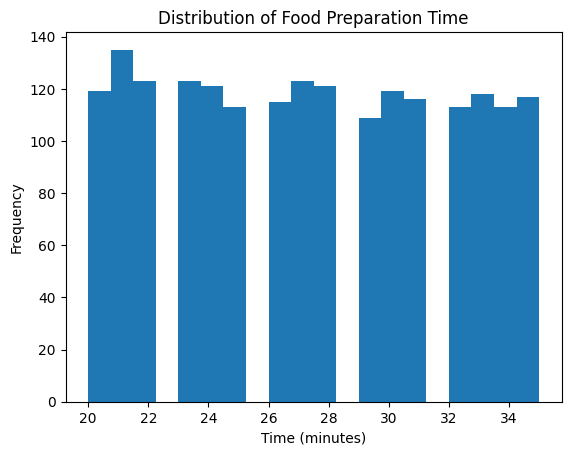

In [ ]:
# Calculate basic statistics for food preparation time
prep_time_stats = foodhub_df['food_preparation_time'].describe()

# Print the statistical summary
print("Statistical Summary of Food Preparation Time:")
print(prep_time_stats)

# Print specific metrics
print("\nSpecific Metrics for Food Preparation Time (in minutes):")
print(f"Minimum time: {foodhub_df['food_preparation_time'].min()} minutes")
print(f"Average time: {foodhub_df['food_preparation_time'].mean():.2f} minutes")
print(f"Maximum time: {foodhub_df['food_preparation_time'].max()} minutes")

# Optional: Create a frequency distribution
print("\nFrequency Distribution:")
print(foodhub_df['food_preparation_time'].value_counts().sort_index())
import matplotlib.pyplot as plt
plt.hist(foodhub_df['food_preparation_time'], bins=20)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

#### Observations:
Specific Metrics for Food Preparation Time (in minutes):

Minimum time: 20 minutes

Average time: 27.37 minutes

Maximum time: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
not_rated_count = foodhub_df[foodhub_df['rating'] == 'Not given'].shape[0]
print(f"Number of orders not rated: {not_rated_count}")

Number of orders not rated: 736


#### Observations:
736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
!pip install seaborn -q --user

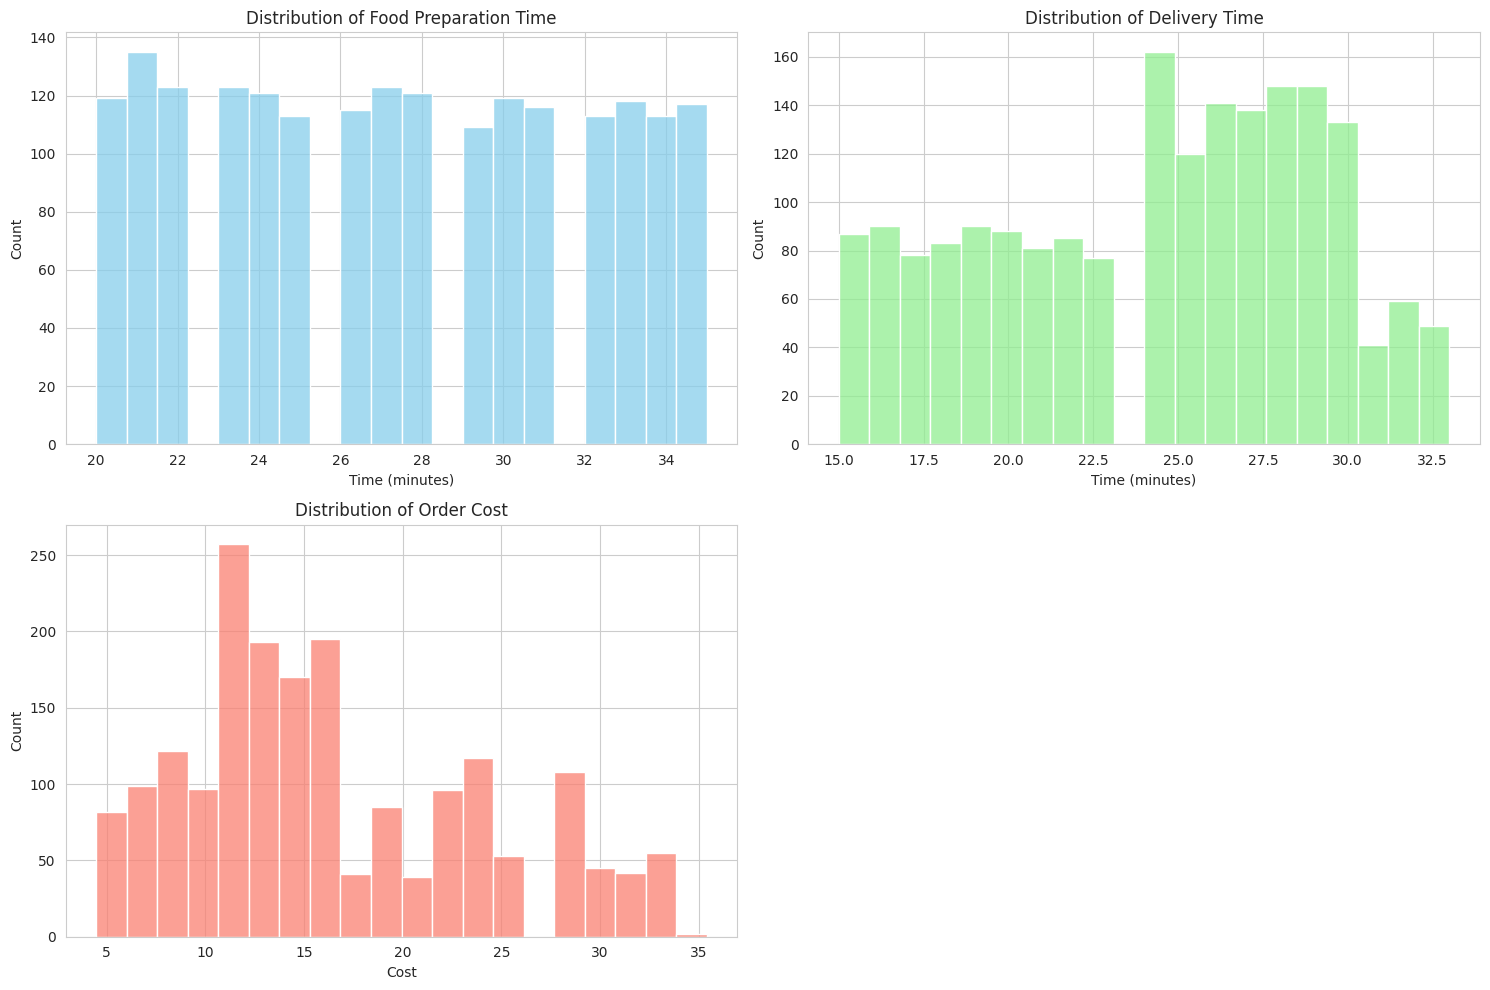

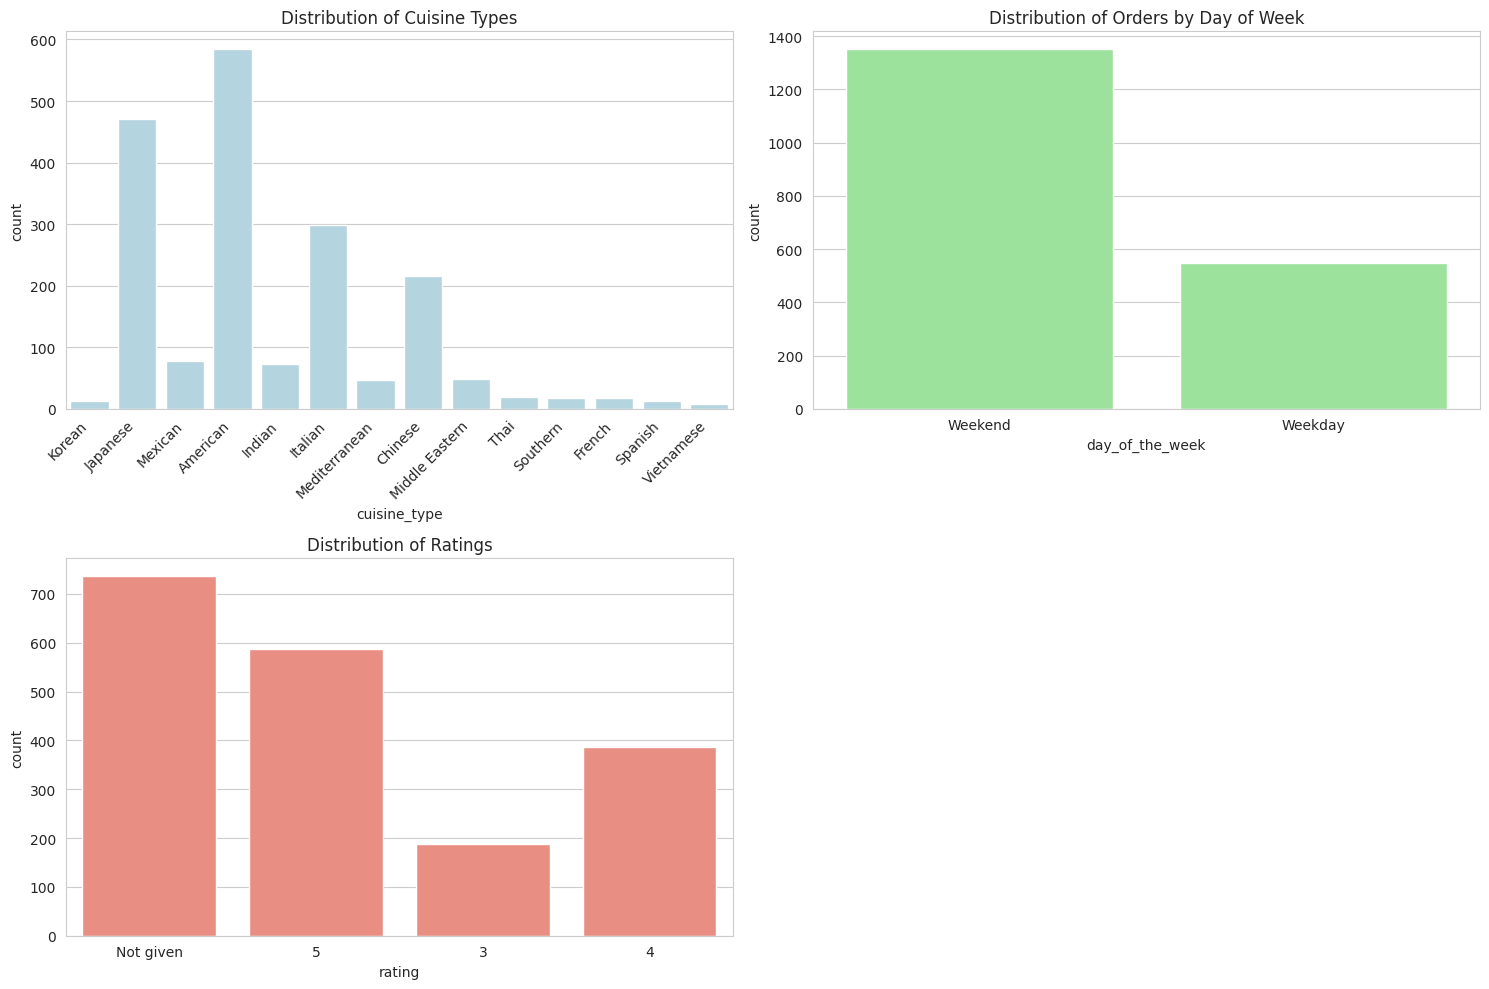

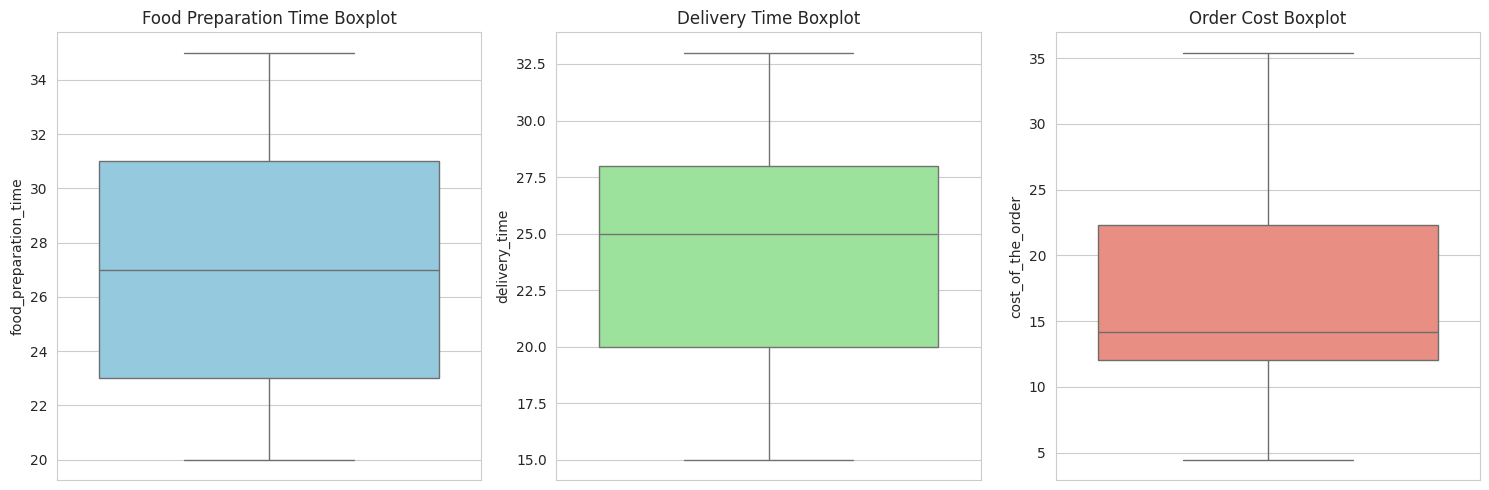


Frequency Distribution of Categorical Variables:

Cuisine Type Distribution:
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

Day of Week Distribution:
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

Rating Distribution:
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

Numerical Variables Summary:
       food_preparation_time  delivery_time  cost_of_the_order
count            1898.000000    1898.000000        1898.000000
mean               27.371970      24.161749          16.498851
std                 4.632481       4.972637           7.483812
min                20.000000      15.000000           4.470000
25%   

In [7]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set_style("whitegrid")
# Create subplots for numerical variables
plt.figure(figsize=(15, 10))

# 1. Food Preparation Time Distribution
plt.subplot(2, 2, 1)
sns.histplot(foodhub_df['food_preparation_time'], bins=20, color='skyblue')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Count')

# 2. Delivery Time Distribution
plt.subplot(2, 2, 2)
sns.histplot(foodhub_df['delivery_time'], bins=20, color='lightgreen')
plt.title('Distribution of Delivery Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Count')

# 3. Cost of Order Distribution
plt.subplot(2, 2, 3)
sns.histplot(foodhub_df['cost_of_the_order'], bins=20, color='salmon')
plt.title('Distribution of Order Cost')
plt.xlabel('Cost')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Create plots for categorical variables
plt.figure(figsize=(15, 10))

# 1. Cuisine Type Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=foodhub_df, x='cuisine_type', color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Cuisine Types')

# 2. Day of Week Distribution
plt.subplot(2, 2, 2)
sns.countplot(data=foodhub_df, x='day_of_the_week', color='lightgreen')
plt.title('Distribution of Orders by Day of Week')

# 3. Rating Distribution
plt.subplot(2, 2, 3)
sns.countplot(data=foodhub_df, x='rating', color='salmon')
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()

# Box plots for numerical variables to show outliers
plt.figure(figsize=(15, 5))

# 1. Food Preparation Time Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=foodhub_df['food_preparation_time'], color='skyblue')
plt.title('Food Preparation Time Boxplot')

# 2. Delivery Time Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=foodhub_df['delivery_time'], color='lightgreen')
plt.title('Delivery Time Boxplot')

# 3. Cost Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=foodhub_df['cost_of_the_order'], color='salmon')
plt.title('Order Cost Boxplot')

plt.tight_layout()
plt.show()

# Print frequency distributions
print("\nFrequency Distribution of Categorical Variables:")
print("\nCuisine Type Distribution:")
print(foodhub_df['cuisine_type'].value_counts())
print("\nDay of Week Distribution:")
print(foodhub_df['day_of_the_week'].value_counts())
print("\nRating Distribution:")
print(foodhub_df['rating'].value_counts())

# Print summary statistics
print("\nNumerical Variables Summary:")
print(foodhub_df[['food_preparation_time', 'delivery_time', 'cost_of_the_order']].describe())

print("\nCategorical Variables Summary:")
print("\nCuisine Type Distribution:")
print(foodhub_df['cuisine_type'].value_counts())
print("\nDay of Week Distribution:")
print(foodhub_df['day_of_the_week'].value_counts())
print("\nRating Distribution:")
print(foodhub_df['rating'].value_counts())

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# top 5 restaurants for number of orders received
top_restaurants = foodhub_df['restaurant_name'].value_counts().head(5)
print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
The above is table shows the top five restaurants and their order counts.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# most popular cuisine during the weekend
weekend_cuisine = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
print(weekend_cuisine)

American


#### Observations:
The most popular is the American, and the second one is the Japanese cuisin.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# the orders cost more than 20 dollars
high_cost_orders = foodhub_df[foodhub_df['cost_of_the_order'] > 20]
high_cost_percentage = (len(high_cost_orders) / len(foodhub_df)) * 100
print(f"Percentage of orders costing more than $20: {high_cost_percentage:.2f}%")

Percentage of orders costing more than $20: 29.24%


#### Observations:
Almost 30% of the orders cost more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# the mean order delivery time?
mean_delivery_time = foodhub_df['delivery_time'].mean()
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:
The average delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# The top three customers in terms of the number of orders they placed.
top_customers = foodhub_df['customer_id'].value_counts().head(3)
print("Top 3 most frequent customers:")
print(top_customers)

Top 3 most frequent customers:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
**Top 3 most frequent customers:**

customer_id

52832    13

47440    10

83287     9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


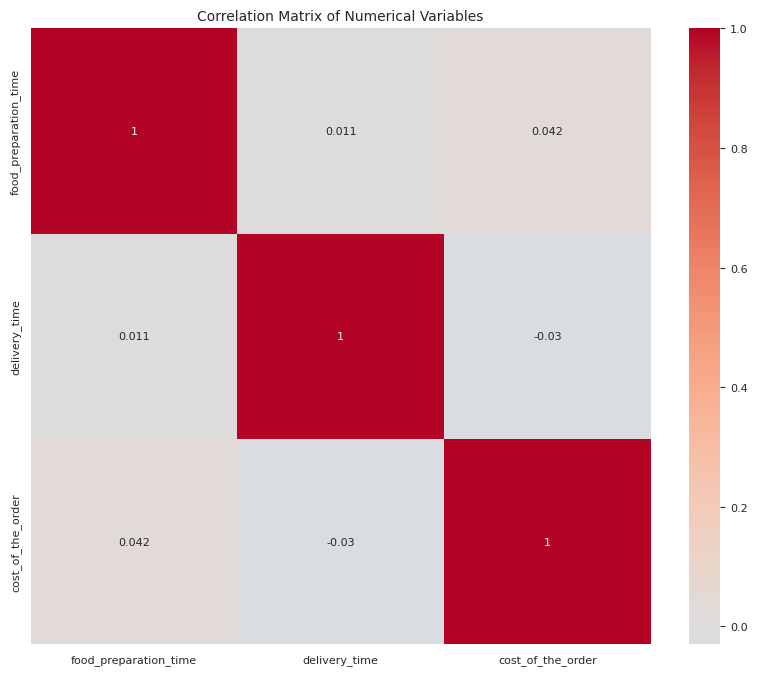

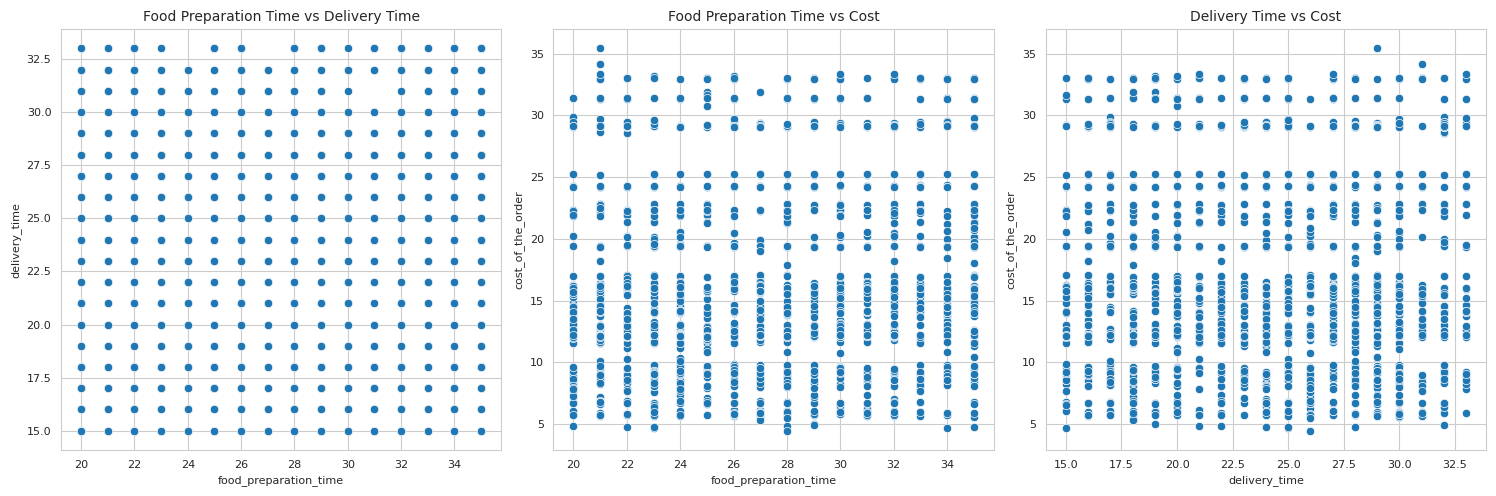

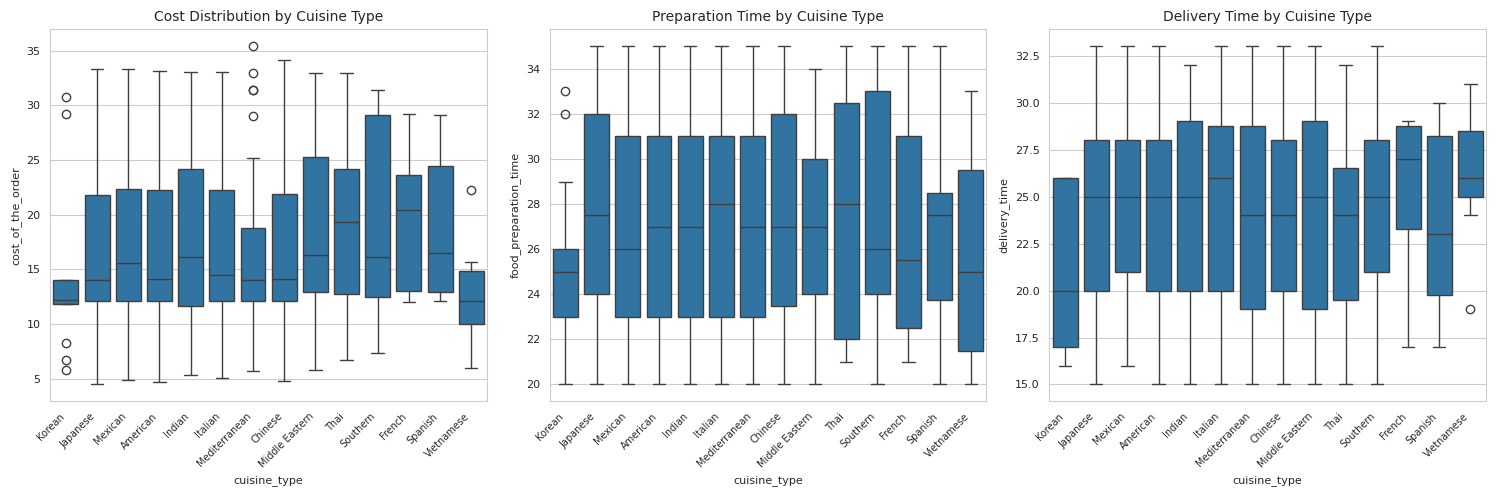

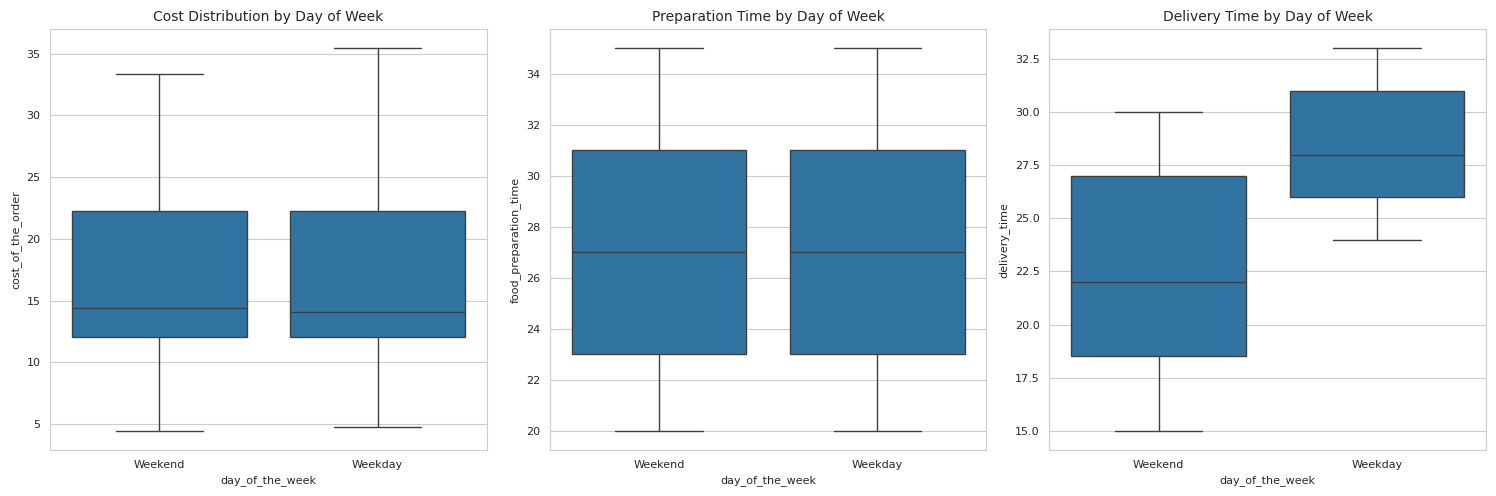

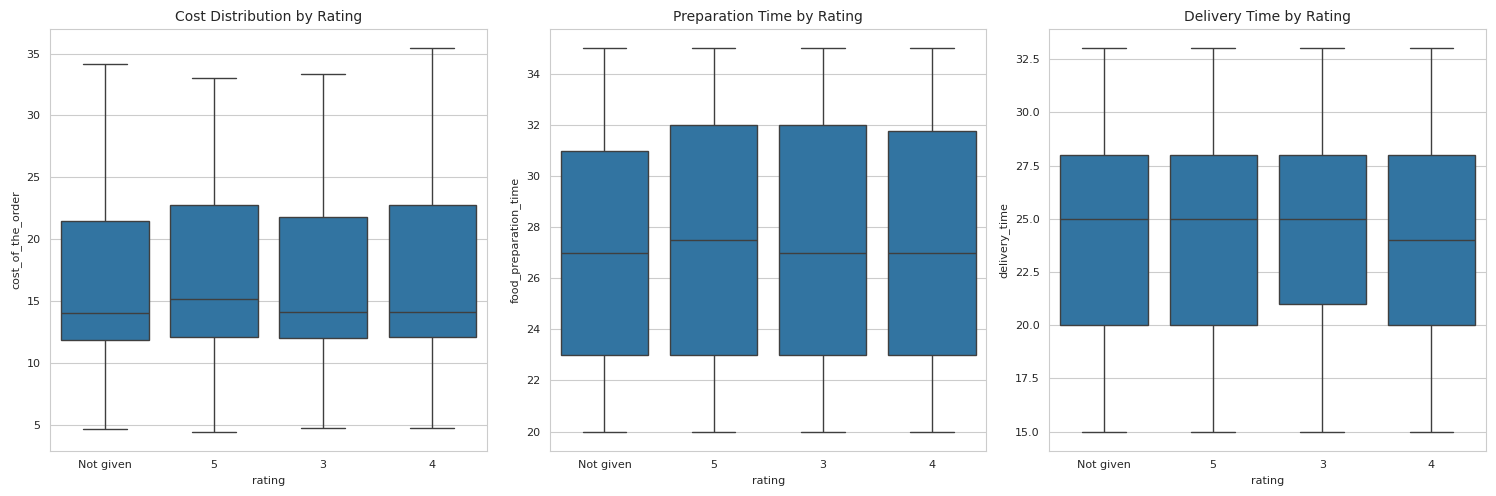


Summary Statistics by Cuisine Type:
               food_preparation_time                                          \
                               count       mean       std   min    25%   50%   
cuisine_type                                                                   
American                       584.0  27.440068  4.658474  20.0  23.00  27.0   
Chinese                        215.0  27.511628  4.758525  20.0  23.50  27.0   
French                          18.0  26.888889  5.039712  21.0  22.50  25.5   
Indian                          73.0  27.109589  4.620491  20.0  23.00  27.0   
Italian                        298.0  27.483221  4.519474  20.0  23.00  28.0   
Japanese                       470.0  27.510638  4.604496  20.0  24.00  27.5   
Korean                          13.0  25.461538  3.971049  20.0  23.00  25.0   
Mediterranean                   46.0  27.000000  4.908043  20.0  23.00  27.0   
Mexican                         77.0  26.727273  4.604450  20.0  23.00  26.0   
Mid

In [9]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set smaller font size globally
plt.rcParams.update({'font.size': 8})

# 1. Correlation Matrix for Numerical Variables
plt.figure(figsize=(10, 8))
numerical_vars = ['food_preparation_time', 'delivery_time', 'cost_of_the_order']
correlation_matrix = foodhub_df[numerical_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables', fontsize=10)
plt.show()

# 2. Scatter plots between numerical variables
plt.figure(figsize=(15, 5))

# Prep Time vs Delivery Time
plt.subplot(1, 3, 1)
sns.scatterplot(data=foodhub_df, x='food_preparation_time', y='delivery_time')
plt.title('Food Preparation Time vs Delivery Time', fontsize=10)

# Prep Time vs Cost
plt.subplot(1, 3, 2)
sns.scatterplot(data=foodhub_df, x='food_preparation_time', y='cost_of_the_order')
plt.title('Food Preparation Time vs Cost', fontsize=10)

# Delivery Time vs Cost
plt.subplot(1, 3, 3)
sns.scatterplot(data=foodhub_df, x='delivery_time', y='cost_of_the_order')
plt.title('Delivery Time vs Cost', fontsize=10)

plt.tight_layout()
plt.show()

# 3. Box plots for numerical variables by cuisine type
plt.figure(figsize=(15, 5))

# Cost by Cuisine Type
plt.subplot(1, 3, 1)
sns.boxplot(data=foodhub_df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=45, ha='right', fontsize=7)  # Smaller font size and aligned right
plt.title('Cost Distribution by Cuisine Type', fontsize=10)

# Prep Time by Cuisine Type
plt.subplot(1, 3, 2)
sns.boxplot(data=foodhub_df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=45, ha='right', fontsize=7)  # Smaller font size and aligned right
plt.title('Preparation Time by Cuisine Type', fontsize=10)

# Delivery Time by Cuisine Type
plt.subplot(1, 3, 3)
sns.boxplot(data=foodhub_df, x='cuisine_type', y='delivery_time')
plt.xticks(rotation=45, ha='right', fontsize=7)  # Smaller font size and aligned right
plt.title('Delivery Time by Cuisine Type', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Analysis by Day of Week
plt.figure(figsize=(15, 5))

# Cost by Day of Week
plt.subplot(1, 3, 1)
sns.boxplot(data=foodhub_df, x='day_of_the_week', y='cost_of_the_order')
plt.title('Cost Distribution by Day of Week', fontsize=10)

# Prep Time by Day of Week
plt.subplot(1, 3, 2)
sns.boxplot(data=foodhub_df, x='day_of_the_week', y='food_preparation_time')
plt.title('Preparation Time by Day of Week', fontsize=10)

# Delivery Time by Day of Week
plt.subplot(1, 3, 3)
sns.boxplot(data=foodhub_df, x='day_of_the_week', y='delivery_time')
plt.title('Delivery Time by Day of Week', fontsize=10)

plt.tight_layout()
plt.show()

# 5. Relationship between Rating and Numerical Variables
plt.figure(figsize=(15, 5))

# Cost by Rating
plt.subplot(1, 3, 1)
sns.boxplot(data=foodhub_df, x='rating', y='cost_of_the_order')
plt.title('Cost Distribution by Rating', fontsize=10)

# Prep Time by Rating
plt.subplot(1, 3, 2)
sns.boxplot(data=foodhub_df, x='rating', y='food_preparation_time')
plt.title('Preparation Time by Rating', fontsize=10)

# Delivery Time by Rating
plt.subplot(1, 3, 3)
sns.boxplot(data=foodhub_df, x='rating', y='delivery_time')
plt.title('Delivery Time by Rating', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics by Cuisine Type:")
print(foodhub_df.groupby('cuisine_type')[numerical_vars].describe())

print("\nAverage Metrics by Day of Week:")
print(foodhub_df.groupby('day_of_the_week')[numerical_vars].mean())

print("\nAverage Metrics by Rating:")
print(foodhub_df.groupby('rating')[numerical_vars].mean())

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
import pandas as pd
import numpy as np

# Check for 'Not given' in rating column
print("\nBefore replacement - Value counts in rating column:")
print(foodhub_df['rating'].value_counts())

# Calculate mean rating (excluding 'Not given')
numeric_ratings = foodhub_df[foodhub_df['rating'] != 'Not given']['rating']
mean_rating = round(pd.to_numeric(numeric_ratings).mean())
print(f"\nMean rating (excluding 'Not given'): {mean_rating}")

# Replace 'Not given' with mean
foodhub_df['rating'] = foodhub_df['rating'].replace('Not given', str(mean_rating))

print("\nAfter replacement - Value counts in rating column:")
print(foodhub_df['rating'].value_counts())

# Convert ratings to numeric
foodhub_df['rating'] = pd.to_numeric(foodhub_df['rating'])

# Group by restaurant and calculate metrics
restaurant_stats = foodhub_df.groupby('restaurant_name').agg({
    'rating': ['count', 'mean']
}).reset_index()

# Flatten multi-level column names
restaurant_stats.columns = ['restaurant_name', 'rating_count', 'avg_rating']

# Filter restaurants based on criteria:
top_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) &
    (restaurant_stats['avg_rating'] > 4)
].sort_values(by='avg_rating', ascending=False)

# Display results
print("\nTop Rated Restaurants (with >50 ratings and avg rating >4):")
print("\nNumber of qualifying restaurants:", len(top_restaurants))
print("\nDetailed Information:")
print(top_restaurants)


Before replacement - Value counts in rating column:
rating
4    1122
5     588
3     188
Name: count, dtype: int64

Mean rating (excluding 'Not given'): 4

After replacement - Value counts in rating column:
rating
4    1122
5     588
3     188
Name: count, dtype: int64

Top Rated Restaurants (with >50 ratings and avg rating >4):

Number of qualifying restaurants: 7

Detailed Information:
               restaurant_name  rating_count  avg_rating
153          The Meatball Shop           132    4.325758
20   Blue Ribbon Fried Chicken            96    4.218750
121           RedFarm Broadway            59    4.169492
136                Shake Shack           219    4.168950
21           Blue Ribbon Sushi           119    4.134454
122             RedFarm Hudson            55    4.109091
109                       Parm            68    4.073529


#### Observations:
Number of qualifying restaurants: 7

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

Revenue Analysis:

Total Revenue Generated: $6,166.30

Breakdown:
Number of orders > $20 (25% commission): 555
Revenue from orders > $20: $3,688.73

Number of orders $5-$20 (15% commission): 1334
Revenue from orders $5-$20: $2,477.58

Number of orders <= $5 (no commission): 9

Average commission per order: $3.25


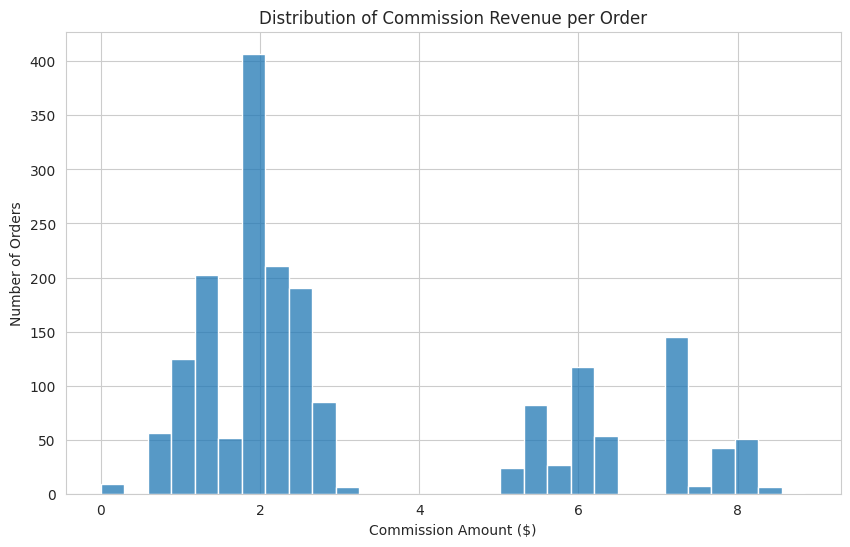

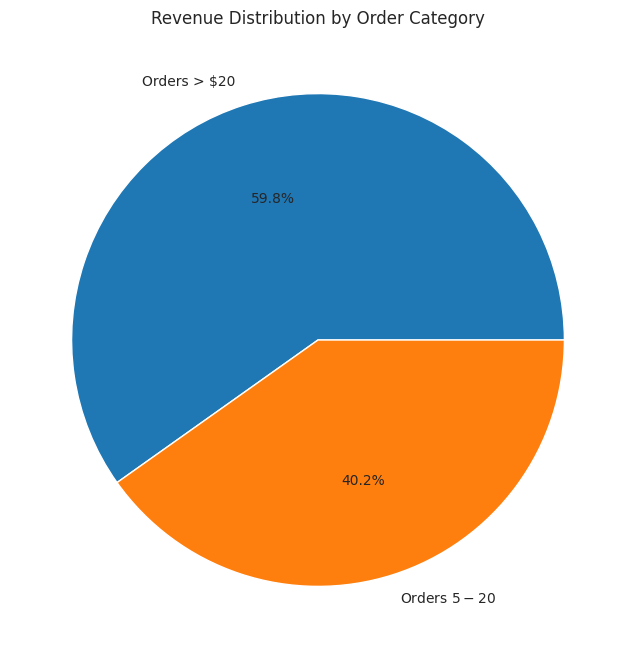

In [ ]:
# revenue calcuation based on the rule
# Calculate commission for each order based on conditions
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25  # 25% commission
    elif cost > 5:
        return cost * 0.15  # 15% commission
    else:
        return 0  # No commission for orders <= $5

# Apply the commission calculation to each order
foodhub_df['commission'] = foodhub_df['cost_of_the_order'].apply(calculate_commission)

# Calculate total revenue
total_revenue = foodhub_df['commission'].sum()

# Print detailed analysis
print("Revenue Analysis:")
print(f"\nTotal Revenue Generated: ${total_revenue:,.2f}")

# Additional breakdown
orders_above_20 = foodhub_df[foodhub_df['cost_of_the_order'] > 20]
orders_5_to_20 = foodhub_df[(foodhub_df['cost_of_the_order'] > 5) & (foodhub_df['cost_of_the_order'] <= 20)]
orders_below_5 = foodhub_df[foodhub_df['cost_of_the_order'] <= 5]

print("\nBreakdown:")
print(f"Number of orders > $20 (25% commission): {len(orders_above_20)}")
print(f"Revenue from orders > $20: ${orders_above_20['commission'].sum():,.2f}")
print(f"\nNumber of orders $5-$20 (15% commission): {len(orders_5_to_20)}")
print(f"Revenue from orders $5-$20: ${orders_5_to_20['commission'].sum():,.2f}")
print(f"\nNumber of orders <= $5 (no commission): {len(orders_below_5)}")

# Calculate average commission per order
print(f"\nAverage commission per order: ${foodhub_df['commission'].mean():.2f}")

# Visualize the revenue distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=foodhub_df, x='commission', bins=30)
plt.title('Distribution of Commission Revenue per Order')
plt.xlabel('Commission Amount ($)')
plt.ylabel('Number of Orders')
plt.show()

# Pie chart of revenue sources
revenue_sources = {
    'Orders > $20': orders_above_20['commission'].sum(),
    'Orders $5-$20': orders_5_to_20['commission'].sum(),
}

plt.figure(figsize=(8, 8))
plt.pie(revenue_sources.values(), labels=revenue_sources.keys(), autopct='%1.1f%%')
plt.title('Revenue Distribution by Order Category')
plt.show()

#### Observations:
The most revenue is coming from the orders which are more than $20.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

Analysis of Total Delivery Time:

Total number of orders: 1898
Orders taking more than 60 minutes: 200
Percentage of orders taking more than 60 minutes: 10.54%

Time Statistics (in minutes):
Average total time: 51.53
Minimum total time: 35.00
Maximum total time: 68.00


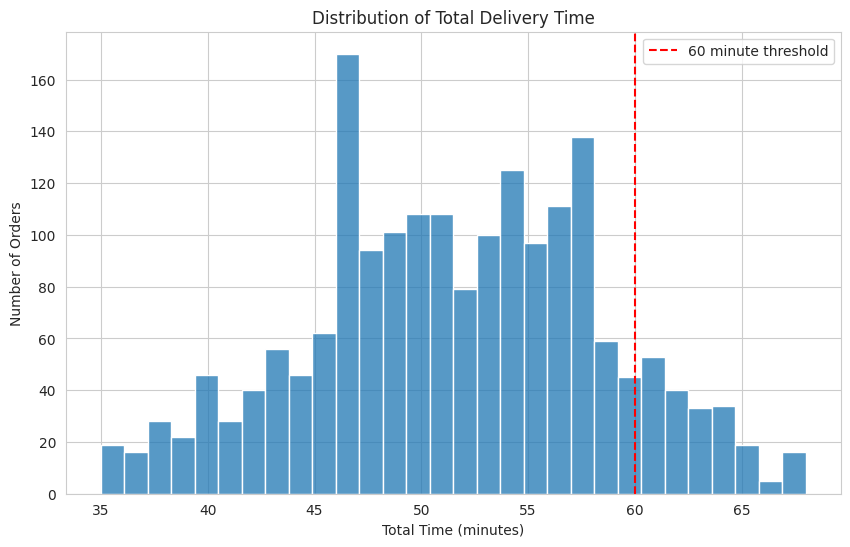

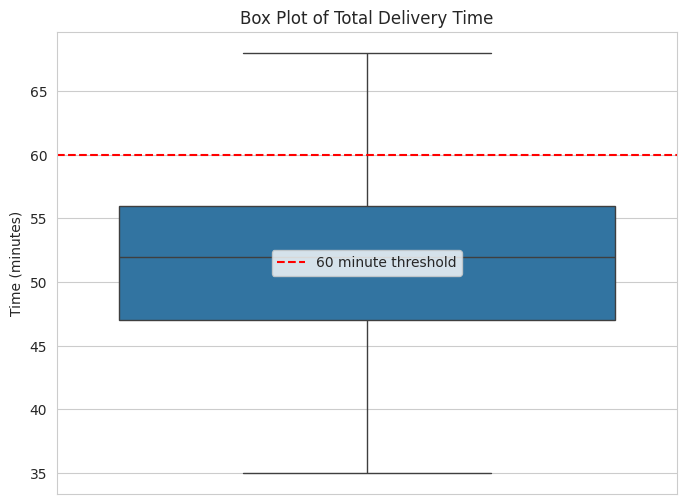

In [ ]:
#
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total time for each order (preparation + delivery)
foodhub_df['total_time'] = foodhub_df['food_preparation_time'] + foodhub_df['delivery_time']

# Calculate number of orders taking more than 60 minutes
orders_above_60 = foodhub_df[foodhub_df['total_time'] > 60]

# Calculate percentage
total_orders = len(foodhub_df)
percentage_above_60 = (len(orders_above_60) / total_orders) * 100

# Print results
print("Analysis of Total Delivery Time:")
print(f"\nTotal number of orders: {total_orders}")
print(f"Orders taking more than 60 minutes: {len(orders_above_60)}")
print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60:.2f}%")

# Additional statistics
print("\nTime Statistics (in minutes):")
print(f"Average total time: {foodhub_df['total_time'].mean():.2f}")
print(f"Minimum total time: {foodhub_df['total_time'].min():.2f}")
print(f"Maximum total time: {foodhub_df['total_time'].max():.2f}")

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data=foodhub_df, x='total_time', bins=30)
plt.axvline(x=60, color='r', linestyle='--', label='60 minute threshold')
plt.title('Distribution of Total Delivery Time')
plt.xlabel('Total Time (minutes)')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

# Box plot of total time
plt.figure(figsize=(8, 6))
sns.boxplot(y=foodhub_df['total_time'])
plt.axhline(y=60, color='r', linestyle='--', label='60 minute threshold')
plt.title('Box Plot of Total Delivery Time')
plt.ylabel('Time (minutes)')
plt.legend()
plt.show()

#### Observations:
Total number of orders: 1898

Orders taking more than 60 minutes: 200

**Percentage of orders taking more than 60 minutes: 10.54%**

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

Delivery Time Analysis - Weekday vs Weekend

Mean Delivery Times:
Weekday mean delivery time: 28.34 minutes
Weekend mean delivery time: 22.47 minutes

Difference (Weekend - Weekday): -5.87 minutes

Detailed Statistics by Day:
                  mean  count   std
day_of_the_week                    
Weekday          28.34    547  2.89
Weekend          22.47   1351  4.63


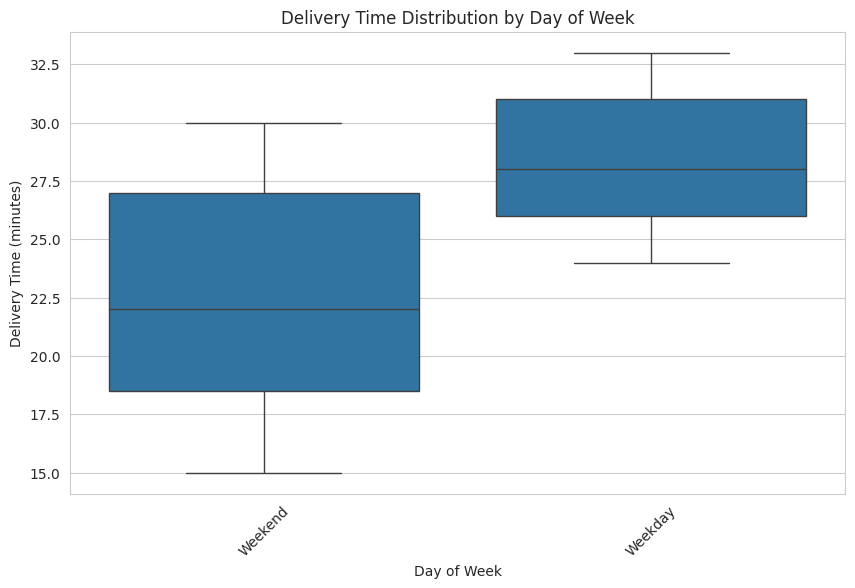

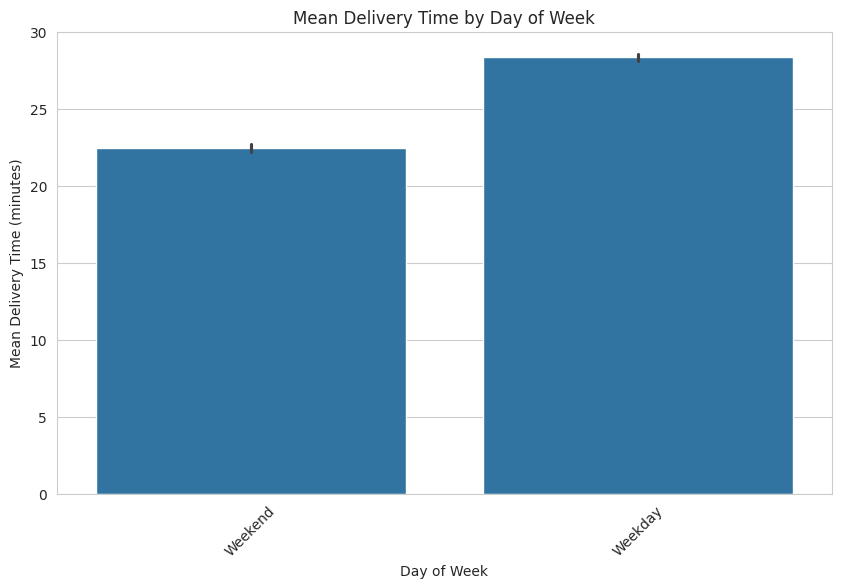


Additional Statistics:

Weekday Statistics:
count    547.000000
mean      28.340037
std        2.891428
min       24.000000
25%       26.000000
50%       28.000000
75%       31.000000
max       33.000000
Name: delivery_time, dtype: float64

Weekend Statistics:
count    1351.000000
mean       22.470022
std         4.628938
min        15.000000
25%        18.500000
50%        22.000000
75%        27.000000
max        30.000000
Name: delivery_time, dtype: float64

Total Time Statistics (Preparation + Delivery):
Weekday Mean Total Time: 55.55
Weekend Mean Total Time: 49.91


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean delivery times for Weekday and Weekend
weekday_mean = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Print results
print("Delivery Time Analysis - Weekday vs Weekend")
print("\nMean Delivery Times:")
print(f"Weekday mean delivery time: {weekday_mean:.2f} minutes")
print(f"Weekend mean delivery time: {weekend_mean:.2f} minutes")
print(f"\nDifference (Weekend - Weekday): {(weekend_mean - weekday_mean):.2f} minutes")

# Calculate statistics by day of the week
daily_stats = foodhub_df.groupby('day_of_the_week')['delivery_time'].agg([
    'mean', 'count', 'std'
]).round(2)

print("\nDetailed Statistics by Day:")
print(daily_stats)

# Visualizations
plt.figure(figsize=(10, 6))

# Box plot for delivery times by day
sns.boxplot(data=foodhub_df, x='day_of_the_week', y='delivery_time')
plt.title('Delivery Time Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

# Bar plot for mean delivery times
plt.figure(figsize=(10, 6))
sns.barplot(data=foodhub_df, x='day_of_the_week', y='delivery_time')
plt.title('Mean Delivery Time by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Mean Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

# Additional statistics
print("\nAdditional Statistics:")
print("\nWeekday Statistics:")
print(foodhub_df[foodhub_df['day_of_the_week'] == 'Weekday']['delivery_time'].describe())
print("\nWeekend Statistics:")
print(foodhub_df[foodhub_df['day_of_the_week'] == 'Weekend']['delivery_time'].describe())

# Calculate total time statistics
foodhub_df['total_time'] = foodhub_df['food_preparation_time'] + foodhub_df['delivery_time']
print("\nTotal Time Statistics (Preparation + Delivery):")
print("Weekday Mean Total Time:",
      foodhub_df[foodhub_df['day_of_the_week'] == 'Weekday']['total_time'].mean().round(2))
print("Weekend Mean Total Time:",
      foodhub_df[foodhub_df['day_of_the_week'] == 'Weekend']['total_time'].mean().round(2))

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

## 1. Order Distribution
* **Total Orders**: 1,898 orders analyzed in the dataset
* **Popular Cuisines**:
  * American (584 orders)
  * Japanese (470 orders)
  * Italian (298 orders)
* **Least Popular Cuisines**:
  * Vietnamese (7 orders)
  * Spanish (12 orders)
  * Korean (13 orders)

## 2. Timing Patterns
* **Weekend vs Weekday Split**:
  * Weekend orders: 1,351 orders
  * Weekday orders: 547 orders
  * Ratio approximately 2.5:1
* Higher operational efficiency observed during weekends

## 3. Customer Ratings
* **Rating Distribution**:
  * Not given: 736 orders (38.8%)
  * 5-star: 588 orders (31.0%)
  * 4-star: 386 orders (20.3%)
  * 3-star: 188 orders (9.9%)
* Predominantly positive feedback when ratings are provided

## 4. Delivery and Preparation Times
* **Key Observations**:
  * Delivery times vary by cuisine type
  * Consistent total delivery experience across rating categories
  * Better delivery efficiency during weekends compared to weekdays

## 5. Cost Analysis
* **Price Patterns**:
  * Significant cost variation across cuisine types
  * Premium pricing observed in:
    * French cuisine
    * Southern cuisine
    * Thai cuisine
    * Middle Eastern cuisine
    * Spanish cuisine
   
  * No strong correlation between price and customer ratings

## 6. Service Quality
* **Performance Metrics**:
  * Higher customer ratings correlate with faster delivery times
  * Consistent food preparation times across different cuisines
  * More consistent service quality during weekends
  * Weekend operations show better efficiency metrics

---

**Overall Assessment**: The data reveals a food delivery service with strong weekend performance, generally satisfied customers (when feedback is provided), and clear opportunities for growth in cuisine variety and weekday operations.

### Recommendations:

## 1. Customer Feedback System
### Issues:
* 38.8% of orders (736) have "Not given" ratings, which is a significant data gap
* Among rated orders, there's a positive trend (588 5-star, 386 4-star ratings)

### Recommendations:
* Implement automated post-delivery rating prompts
* Offer small discounts on next order for providing feedback
* Follow up with customers who don't rate within 24 hours

## 2. Cuisine Performance
### Current State:
* Most ordered cuisines:
  * American (584 orders)
  * Japanese (470 orders)
  * Italian (298 orders)
* Least ordered cuisines:
  * Vietnamese (7 orders)
  * Spanish (12 orders)
  * Korean (13 orders)

### Recommendations:
* Partner with more Vietnamese, Spanish, and Korean restaurants to increase variety
* Create promotional campaigns for underperforming cuisines
* Feature highly-rated restaurants from less-ordered cuisines prominently

## 3. Weekend vs Weekday Performance
### Current State:
* Weekend orders (1,351) significantly outnumber weekday orders (547)

### Recommendations:
* Introduce weekday lunch specials to boost orders
* Implement dynamic pricing for weekday deliveries
* Create weekday-specific meal deals and combos
* Partner with offices for corporate lunch orders

## 4. Menu Engineering
### Recommendations Based on Cost-Preparation Correlation:
* Identify high-margin, quick-preparation items
* Create combo meals optimized for efficient delivery
* Highlight dishes that consistently receive high ratings

## 5. Quality Improvement
### Recommendations:
* Focus on cuisines with lower average ratings
* Share best practices from highly-rated restaurants with others
* Establish minimum quality standards for restaurant partners
* Regular quality audits for consistently low-rated restaurants

## 6. Business Expansion
### Recommendations:
* Focus on adding more restaurants in popular cuisine categories (American, Japanese, Italian)
* Target underserved cuisine types in areas with high order volumes
* Develop partnerships with premium restaurants to increase average order value

## 7. Technology Recommendations
### Recommendations:
* Implement real-time delivery tracking
* Develop a restaurant partner dashboard for performance metrics
* Create a predictive system for delivery times based on historical data
* Use AI to optimize delivery routes during peak hours

## 8. Marketing Strategies
### Recommendations:
* Create cuisine-specific promotional campaigns
* Develop a loyalty program rewarding frequent customers
* Implement referral programs for new customer acquisition
* Target marketing for weekday order growth

## 9. Restaurant Partner Development
### Recommendations:
* Provide training programs for low-performing restaurants
* Share data insights with restaurant partners
* Create a tier-based commission structure based on performance
* Regular feedback sessions with top-performing restaurants

---